In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from seaborn import heatmap
import argparse
import os
import random
from sklearn.metrics import confusion_matrix
from collections import defaultdict

In [2]:
def load_data(input_dir, name, member1_ratio= None, sample_size=None):
    csv_files = os.listdir(input_dir)
    files = [f for f in csv_files if name in f]
    data = {}
    for f in files:
        if 'member1' in f:
            data['member1'] = pd.read_csv(os.path.join(input_dir, f))
        elif 'member2' in f:
            data['member2'] = pd.read_csv(os.path.join(input_dir, f))
        else:
            data['nonmember'] = pd.read_csv(os.path.join(input_dir, f))
    if sample_size:
        if member1_ratio:
            indices = random.sample(range(len(data['member1'])), int(sample_size*member1_ratio))
            data['member1'] = data['member1'].iloc[indices]
            indices = random.sample(range(len(data['member2'])), int(sample_size*(1-member1_ratio)))
            data['member2'] = data['member2'].iloc[indices]
        else:
            indices = random.sample(range(len(data['member1'])), sample_size)
            data['member1'] = data['member1'].iloc[indices]
            indices = random.sample(range(len(data['member2'])), sample_size)
            data['member2'] = data['member2'].iloc[indices]
        
        indices = random.sample(range(len(data['nonmember'])), sample_size)
        data['nonmember'] = data['nonmember'].iloc[indices]

    return data

In [3]:
def normalize(data, n):
    data = [x/n for x in data]
    return data

In [25]:
def mia_histograms(member1, member2, nonmember, label, output_dir, t, threshold):
    # first, clear plt
    plt.clf()
    plt.figure(figsize=(20, 12))  # Adjusted figsize for four subplots
    # plt.fontsize = 6 

    for i, (m1, m2, nm, thresh, lab) in enumerate(zip(member1, member2, nonmember, threshold, label)):
        try:
            # plot histogram of sampled/perturbed sampled on left, original/perturbed original on right
            n = max(max(max(m1), max(m2)), max(nm))
            m1 = normalize(m1, n)
            m2 = normalize(m2, n)
            nm = normalize(nm, n)
            thresh = normalize(thresh, n)

            plt.subplot(2, 2, i+1)  # Adjusted subplot configuration for four subplots
            font = {'size': 16}
            # using rc function
            plt.rc('font', **font)
            plt.hist(m1, alpha=0.5, bins='auto', label='member1', color='red')
            plt.hist(m2, alpha=0.5, bins='auto', label='member2', color='gold')
            plt.hist(nm, alpha=0.6, bins='auto', label='nonmember', color='royalblue')
            plt.axvline(x=thresh[0], color='black', linestyle='dashed', linewidth=2)
            _, max_ylim = plt.ylim()
            plt.xlabel(f'score')
            plt.ylabel('count')
            plt.xlim(0.0, 1.0)
            # if i < 2:
            plt.title(f"{lab} (Thresh: {thresh[0]:.2f})", fontsize=16, fontweight='bold')
            plt.legend()
        except:
            pass
    plt.tight_layout()  # Adjust layout for better spacing
    plt.savefig(f"{output_dir}/hist_mia_{t}_equal_members.png")


### Load data for unlearned and original model

In [5]:
# Change data paths here
input_dir_unlearned = '/scratch/deu9yh/llm_privacy/results/csv/microsoft'
output_dir_unlearned = '/scratch/deu9yh/llm_privacy/graphs/unlearned'

input_dir_original = '/scratch/deu9yh/llm_privacy/results/csv/NousResearch'
output_dir_original = '/scratch/deu9yh/llm_privacy/graphs/original'

data_lira_unlearned = load_data(input_dir_unlearned, 'lira_threshold', member1_ratio=0.5, sample_size=1000)
data_min_k_unlearned = load_data(input_dir_unlearned, 'min_k_threshold', member1_ratio=0.5, sample_size=1000)
data_loss_unlearned = load_data(input_dir_unlearned, 'loss_threshold', member1_ratio=0.5, sample_size=1000)
data_zlib_unlearned = load_data(input_dir_unlearned, 'zlib_threshold', member1_ratio=0.5, sample_size=1000)

data_lira_original = load_data(input_dir_original, 'lira_threshold', member1_ratio=0.5, sample_size=1000)
data_min_k_original = load_data(input_dir_original, 'min_k_threshold', member1_ratio=0.5, sample_size=1000)
data_loss_original = load_data(input_dir_original, 'loss_threshold', member1_ratio=0.5, sample_size=1000)
data_zlib_original = load_data(input_dir_original, 'zlib_threshold', member1_ratio=0.5, sample_size=1000)

### Plot distribution of MIA scores for different attacks (LIRA, Min-K, Loss, Zlib entropy)

In [6]:
def fetch_data(data1, data2, data3, data4, category='member1', attr='criterion'):
    """
    data1: dictionary of dataframes
    data2: dictionary of dataframes
    data3: dictionary of dataframes
    data4: dictionary of dataframes
    category: ['member1', 'member2', 'nonmember']
    attr: ['criterion', 'threshold']
    """
    data = [data1[category][attr], data2[category][attr], data3[category][attr], data4[category][attr]]
    return data

<Figure size 640x480 with 0 Axes>

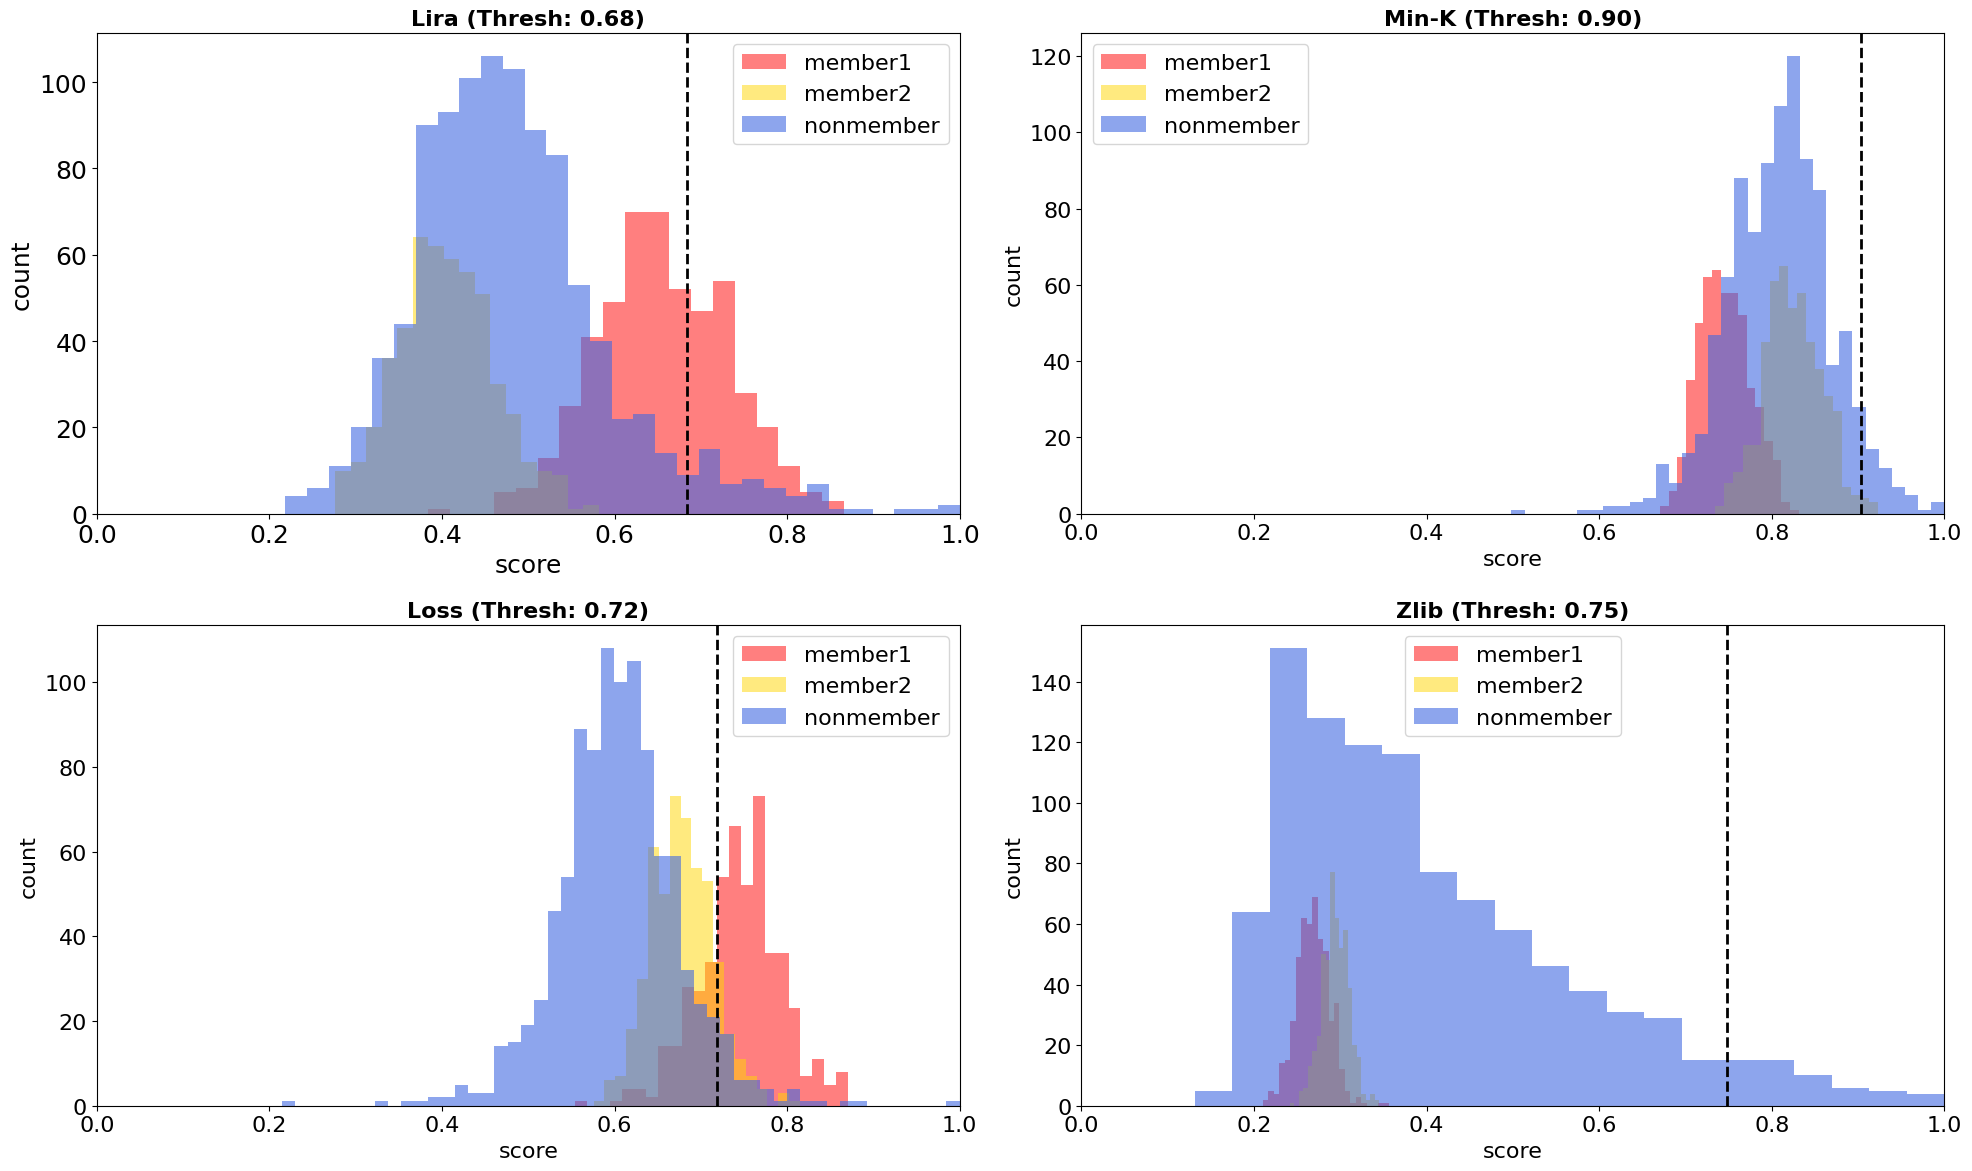

In [26]:
member1 = fetch_data(data_lira_original, data_min_k_original, data_loss_original, data_zlib_original, category = 'member1')
member2 = fetch_data(data_lira_original, data_min_k_original, data_loss_original, data_zlib_original, category = 'member2')
nonmember = fetch_data(data_lira_original, data_min_k_original, data_loss_original, data_zlib_original, category = 'nonmember')
label = ['Lira', 'Min-K', 'Loss', 'Zlib']
threshold_original = fetch_data(data_lira_original, data_min_k_original, data_loss_original, data_zlib_original, category = 'nonmember', attr='threshold')
mia_histograms(member1, member2, nonmember, label, output_dir_original, 'original', threshold_original)

<Figure size 640x480 with 0 Axes>

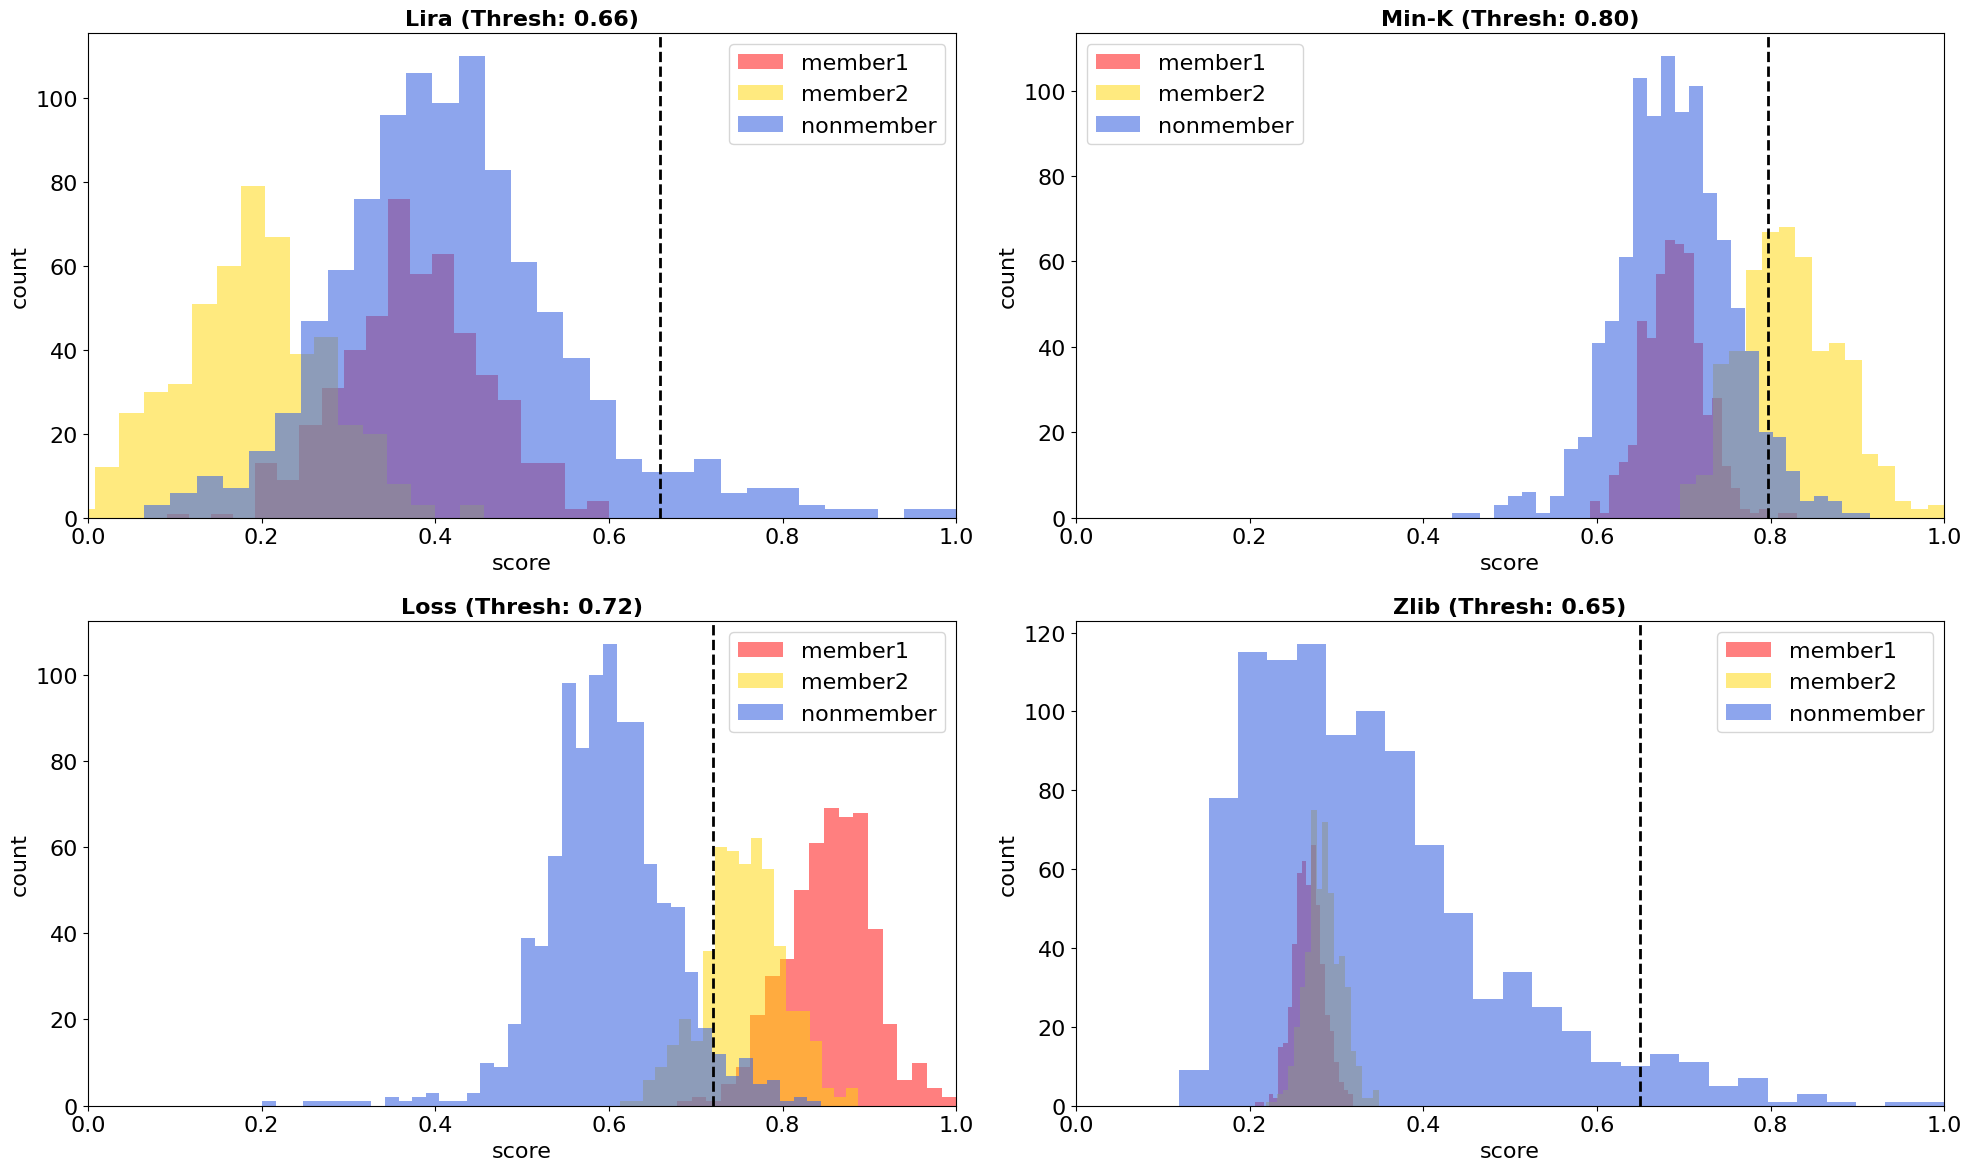

In [27]:
member1 = fetch_data(data_lira_unlearned, data_min_k_unlearned, data_loss_unlearned, data_zlib_unlearned, category = 'member1')
member2 = fetch_data(data_lira_unlearned, data_min_k_unlearned, data_loss_unlearned, data_zlib_unlearned, category = 'member2')
nonmember = fetch_data(data_lira_unlearned, data_min_k_unlearned, data_loss_unlearned, data_zlib_unlearned, category = 'nonmember')
label = ['Lira', 'Min-K', 'Loss', 'Zlib']
threshold_unlearned = fetch_data(data_lira_unlearned, data_min_k_unlearned, data_loss_unlearned, data_zlib_unlearned, category = 'nonmember', attr='threshold')
mia_histograms(member1, member2, nonmember, label, output_dir_unlearned, 'unlearned', threshold_unlearned)

### Data Analysis

#### Original Model

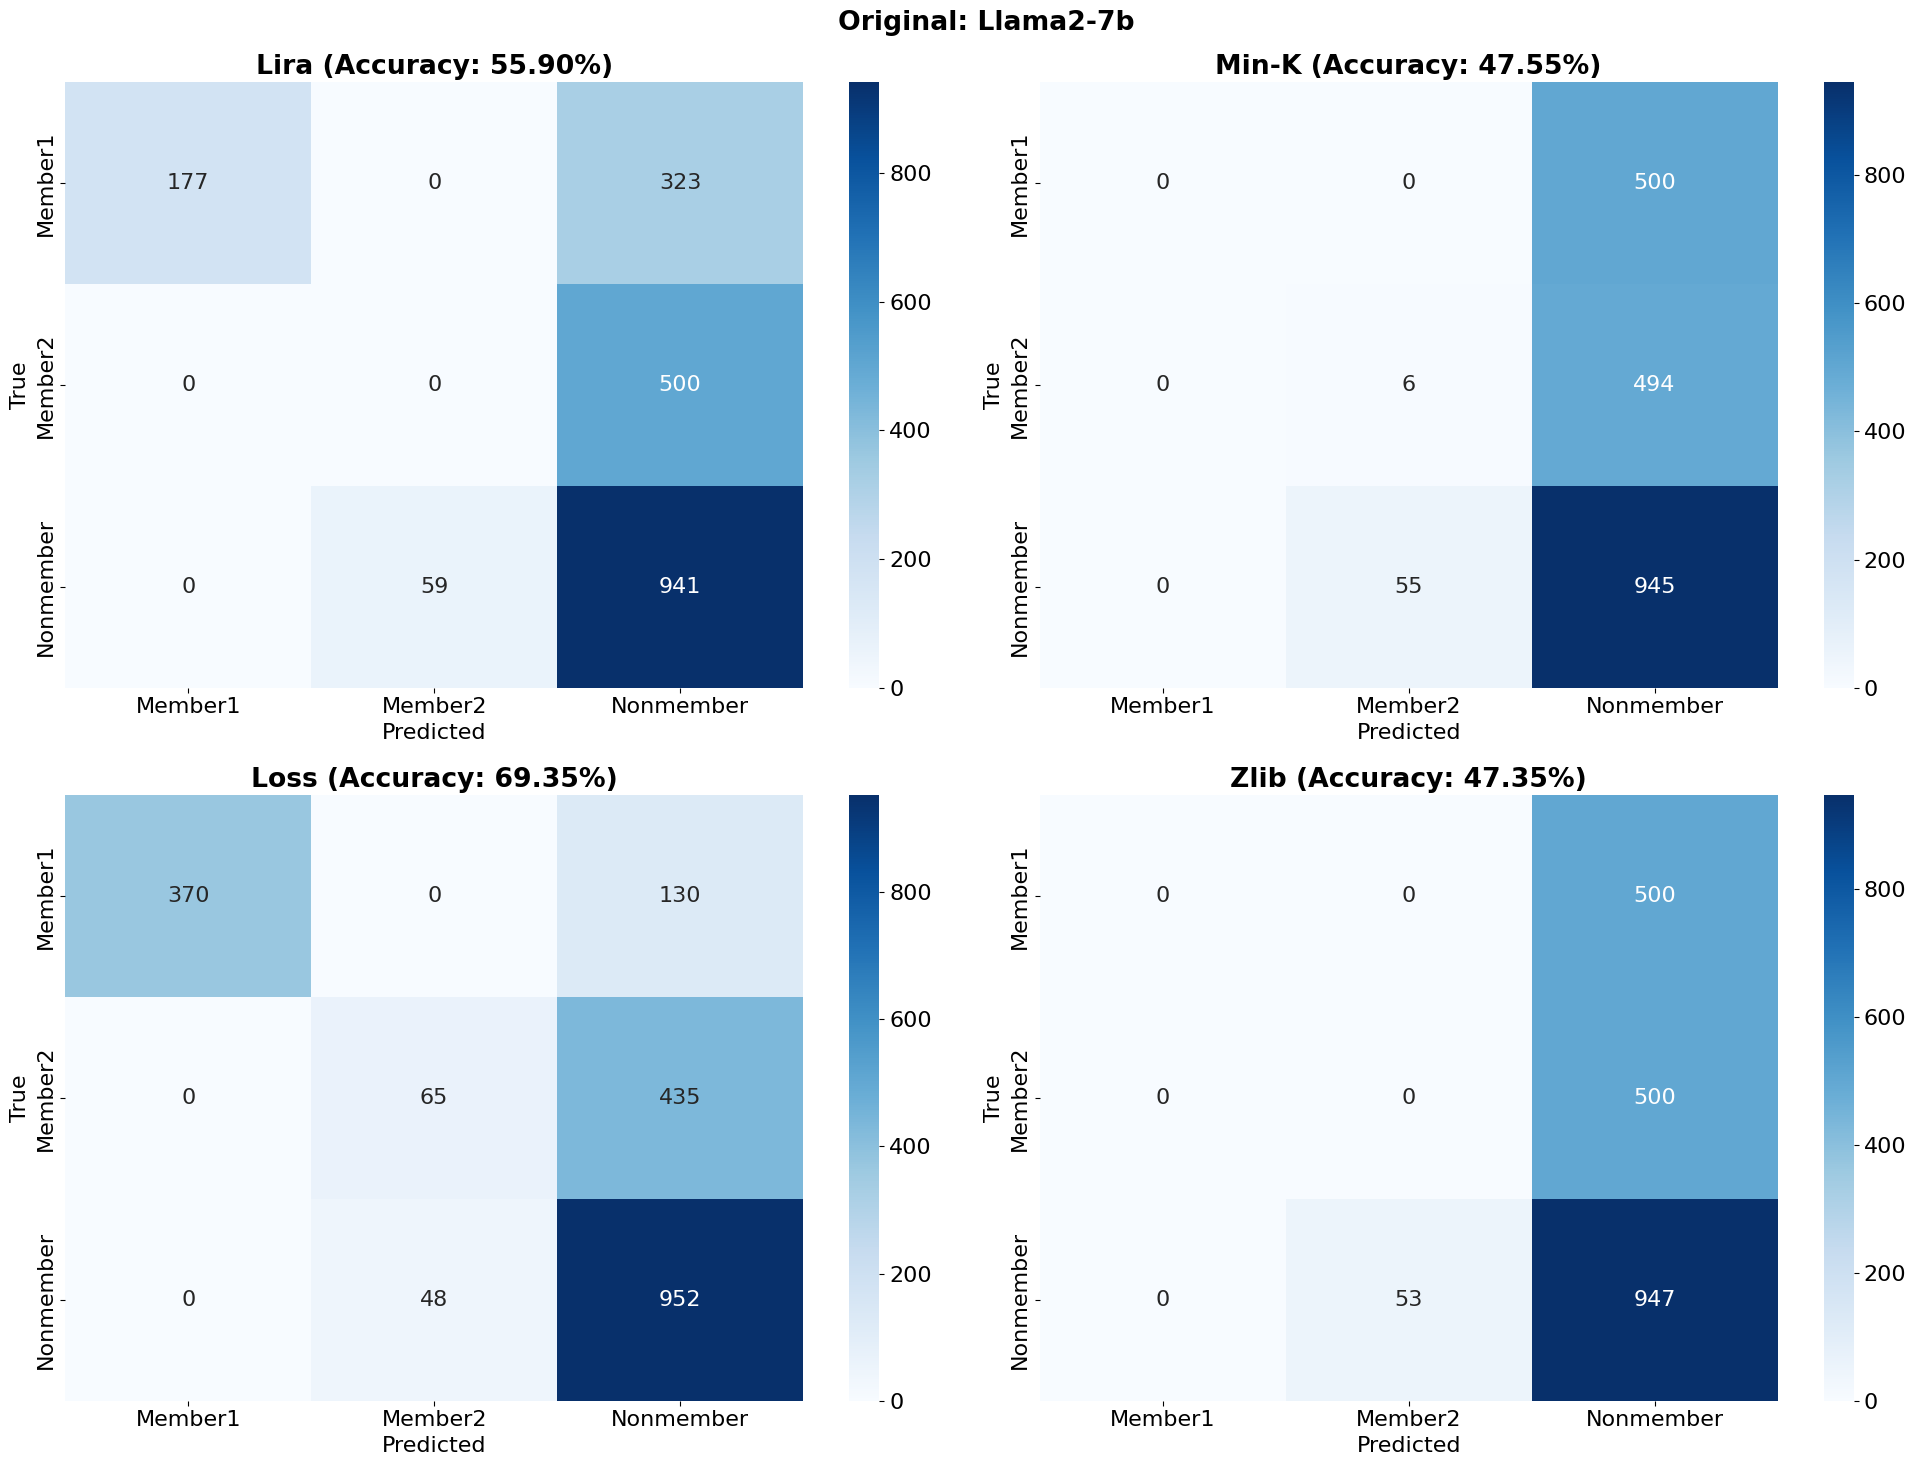

In [28]:
# Get the true labels and predicted labels
data = defaultdict(list)
data['true_labels'] = ['member1'] * len(data_lira_original['member1']) + ['member2'] * len(data_lira_original['member2']) + ['nonmember'] * len(data_lira_original['nonmember'])

for key, d in zip(['Lira', 'Min-K', 'Loss', 'Zlib'], [data_lira_original, data_min_k_original, data_loss_original, data_zlib_original]):
    data[key] = ['member1' if x==1 else 'nonmember' for x in d['member1']['prediction']] + ['member2' if x==1 else 'nonmember' for x in d['member2']['prediction']] + ['member2' if x==1 else 'nonmember' for x in d['nonmember']['prediction']]
# predicted_labels = ['member1'] * len(data_lira_original['member1']['prediction']) + ['member2'] * len(data_lira_original['member2']['criterion']) + ['nonmember'] * len(data_lira_original['nonmember']['criterion'])

# Plotting confusion matrix for unlearned model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

plt.suptitle("Original: Llama2-7b", fontweight='bold')
plt.fontsize = 10

key = 'Lira' 
cm_lira = confusion_matrix(data['true_labels'], data[key])
accuracy = np.trace(cm_lira)/np.sum(cm_lira)
heatmap(cm_lira, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title(f"{key} (Accuracy: {accuracy*100:.2f}%)", fontweight='bold')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')
axes[0, 0].set_xticklabels(['Member1', 'Member2', 'Nonmember'])
axes[0, 0].set_yticklabels(['Member1', 'Member2', 'Nonmember'])

key = 'Min-K' 
cm_min_k = confusion_matrix(data['true_labels'], data[key])
accuracy = np.trace(cm_min_k)/np.sum(cm_min_k)
heatmap(cm_min_k, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title(f"{key} (Accuracy: {accuracy*100:.2f}%)", fontweight='bold')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')
axes[0, 1].set_xticklabels(['Member1', 'Member2', 'Nonmember'])
axes[0, 1].set_yticklabels(['Member1', 'Member2', 'Nonmember'])

key = 'Loss' 
cm_loss = confusion_matrix(data['true_labels'], data[key])
accuracy = np.trace(cm_loss)/np.sum(cm_loss)
heatmap(cm_loss, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title(f"{key} (Accuracy: {accuracy*100:.2f}%)", fontweight='bold')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')
axes[1, 0].set_xticklabels(['Member1', 'Member2', 'Nonmember'])
axes[1, 0].set_yticklabels(['Member1', 'Member2', 'Nonmember'])

key = 'Zlib' 
cm_zlib = confusion_matrix(data['true_labels'], data[key])
accuracy = np.trace(cm_zlib)/np.sum(cm_zlib)
heatmap(cm_zlib, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title(f"{key} (Accuracy: {accuracy*100:.2f}%)", fontweight='bold')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')
axes[1, 1].set_xticklabels(['Member1', 'Member2', 'Nonmember'])
axes[1, 1].set_yticklabels(['Member1', 'Member2', 'Nonmember'])

plt.tight_layout()
plt.savefig(f"{output_dir_original}/confusion_matrix_original_member_0_5.png")

#### Unlearned

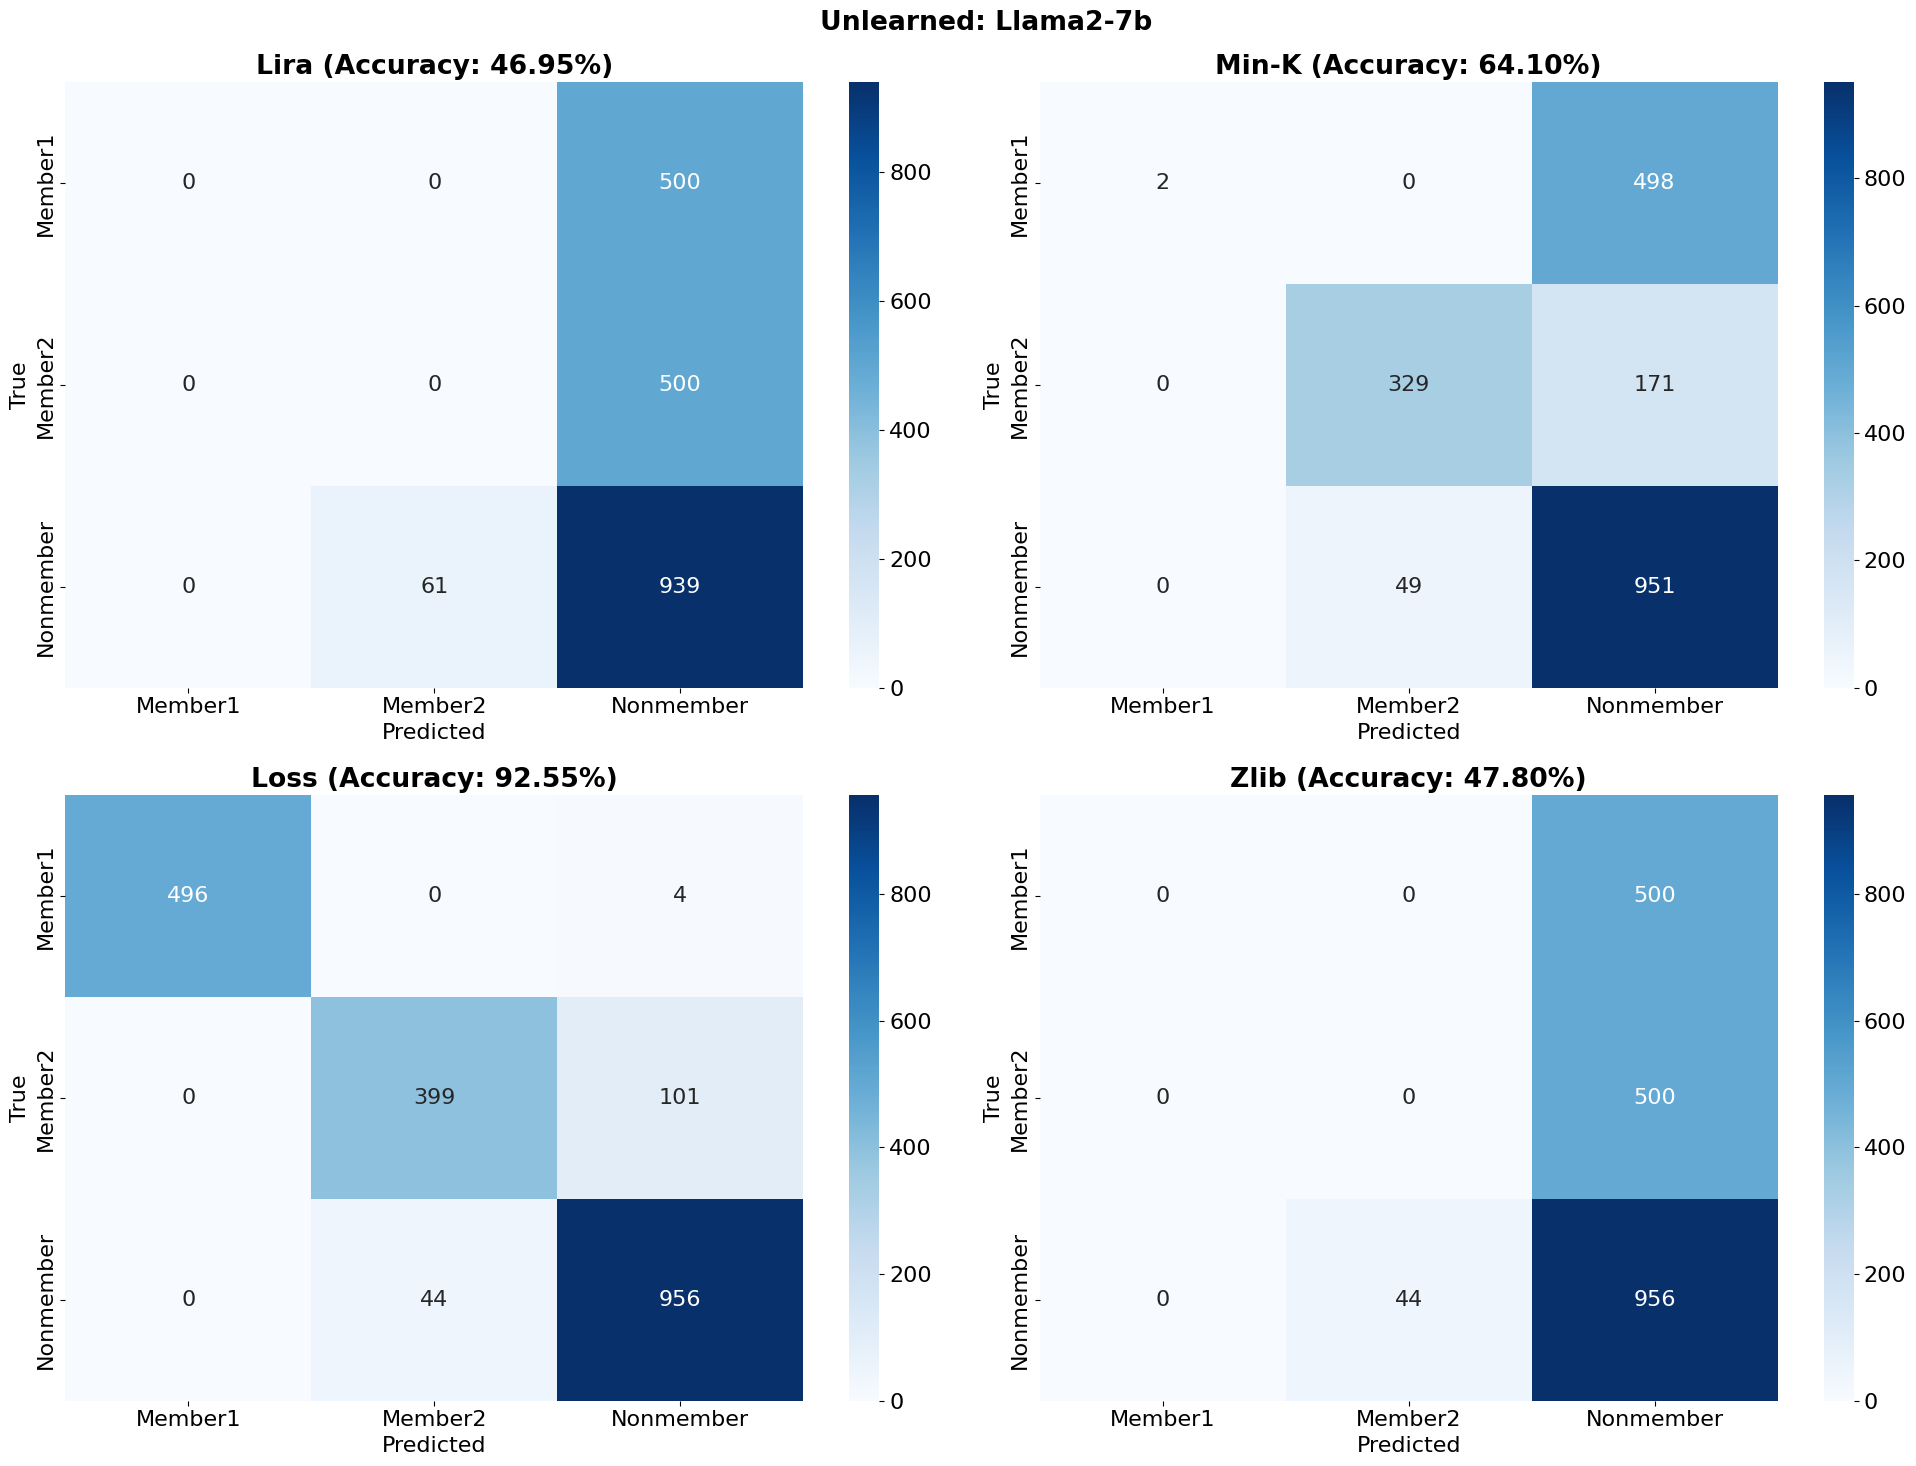

In [29]:
# Get the true labels and predicted labels
data = defaultdict(list)
data['true_labels'] = ['member1'] * len(data_lira_unlearned['member1']) + ['member2'] * len(data_lira_unlearned['member2']) + ['nonmember'] * len(data_lira_unlearned['nonmember'])

for key, d in zip(['Lira', 'Min-K', 'Loss', 'Zlib'], [data_lira_unlearned, data_min_k_unlearned, data_loss_unlearned, data_zlib_unlearned]):
    data[key] = ['member1' if x==1 else 'nonmember' for x in d['member1']['prediction']] + ['member2' if x==1 else 'nonmember' for x in d['member2']['prediction']] + ['member2' if x==1 else 'nonmember' for x in d['nonmember']['prediction']]
# predicted_labels = ['member1'] * len(data_lira_unlearned['member1']['prediction']) + ['member2'] * len(data_lira_unlearned['member2']['criterion']) + ['nonmember'] * len(data_lira_unlearned['nonmember']['criterion'])

# Plotting confusion matrix for unlearned model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

plt.suptitle("Unlearned: Llama2-7b", fontweight='bold')
plt.fontsize = 10

key = 'Lira' 
cm_lira = confusion_matrix(data['true_labels'], data[key])
accuracy = np.trace(cm_lira)/np.sum(cm_lira)
heatmap(cm_lira, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title(f"{key} (Accuracy: {accuracy*100:.2f}%)", fontweight='bold')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')
axes[0, 0].set_xticklabels(['Member1', 'Member2', 'Nonmember'])
axes[0, 0].set_yticklabels(['Member1', 'Member2', 'Nonmember'])

key = 'Min-K' 
cm_min_k = confusion_matrix(data['true_labels'], data[key])
accuracy = np.trace(cm_min_k)/np.sum(cm_min_k)
heatmap(cm_min_k, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title(f"{key} (Accuracy: {accuracy*100:.2f}%)", fontweight='bold')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')
axes[0, 1].set_xticklabels(['Member1', 'Member2', 'Nonmember'])
axes[0, 1].set_yticklabels(['Member1', 'Member2', 'Nonmember'])

key = 'Loss' 
cm_loss = confusion_matrix(data['true_labels'], data[key])
accuracy = np.trace(cm_loss)/np.sum(cm_loss)
heatmap(cm_loss, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title(f"{key} (Accuracy: {accuracy*100:.2f}%)", fontweight='bold')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')
axes[1, 0].set_xticklabels(['Member1', 'Member2', 'Nonmember'])
axes[1, 0].set_yticklabels(['Member1', 'Member2', 'Nonmember'])

key = 'Zlib' 
cm_zlib = confusion_matrix(data['true_labels'], data[key])
accuracy = np.trace(cm_zlib)/np.sum(cm_zlib)
heatmap(cm_zlib, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title(f"{key} (Accuracy: {accuracy*100:.2f}%)", fontweight='bold')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')
axes[1, 1].set_xticklabels(['Member1', 'Member2', 'Nonmember'])
axes[1, 1].set_yticklabels(['Member1', 'Member2', 'Nonmember'])

plt.tight_layout()
plt.savefig(f"{output_dir_unlearned}/confusion_matrix_unlearned_member_0_5.png")